# Gradient Descent for Linear Regression: Advertising Dataset
This example demonstrates how to implement gradient descent for linear regression using the "Advertising" dataset, which captures the relationship between advertising spending and product sales. The goal is to find a line that best fits the data by minimizing the mean squared error (MSE).

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading the "Advertising" Dataset

In [6]:
# Load the dataset from an external source
data_url = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv"
advertising_data = pd.read_csv(data_url)

# Display the first few rows of the dataset
advertising_data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Visualizing the Data

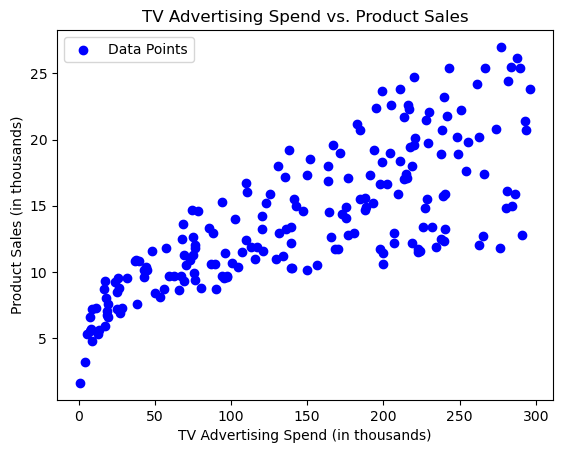

In [17]:
# Plot the data to visualize the relationship between TV advertising and sales
plt.scatter(advertising_data['TV'], advertising_data['Sales'], c='blue', label='Data Points')
plt.xlabel('TV Advertising Spend (in thousands)')
plt.ylabel('Product Sales (in thousands)')
plt.title('TV Advertising Spend vs. Product Sales')
plt.legend()
plt.show()


# Preparing the Data for Linear Regression

In [25]:
# Create feature (X) and target (y) variables
X = advertising_data['TV'].values.reshape(-1, 1)
y = advertising_data['Sales'].values.reshape(-1, 1)

# Add a column of ones for the intercept term
X_b = np.c_[np.ones((len(X), 1)), X]

# Initialize the model parameters (intercept and slope)
theta_initial = np.random.randn(2, 1)


# Implementing Gradient Descent
Gradient descent minimizes the cost function by updating the model parameters (slope and intercept) iteratively. The learning rate controls how much the parameters are updated in each step.

In [26]:
# Function to compute the cost (mean squared error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y

        # Compute gradients
        gradients = (1 / m) * X.T.dot(errors)

        # Update parameters
        theta -= learning_rate * gradients

        # Store the cost at each iteration
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


# Running Gradient Descent to Optimize Parameters

In [27]:
# Set the learning rate and number of iterations
learning_rate = 0.0001
num_iterations = 1000

# Optimize the model parameters using gradient descent
theta_final, cost_history = gradient_descent(X_b, y, theta_initial, learning_rate, num_iterations)

# Display the optimized parameters
print("Optimized parameters (intercept and slope):", theta_final)


Optimized parameters (intercept and slope): [[-4.75819398e+275]
 [-9.36974808e+277]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16468\3964377536.py:5: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)


# Visualizing the Results

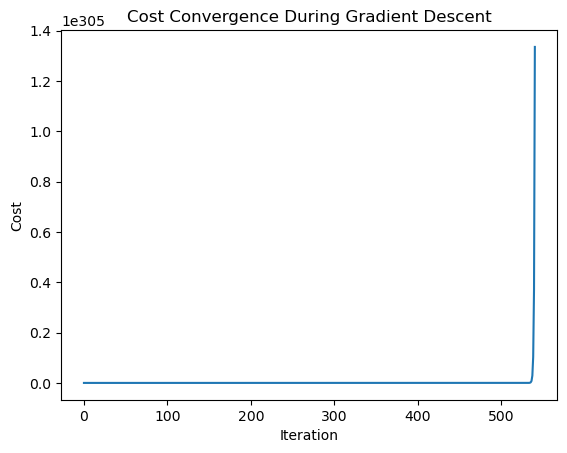

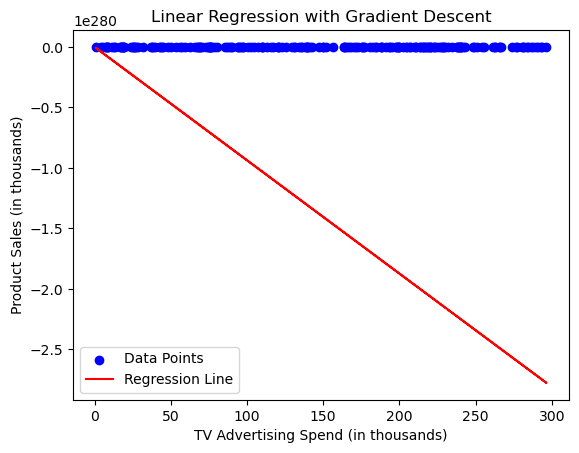

In [28]:
# Plot the cost history to visualize the convergence of gradient descent
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Convergence During Gradient Descent")
plt.show()

# Plot the best-fitting regression line
plt.scatter(advertising_data['TV'], advertising_data['Sales'], c='blue', label='Data Points')
plt.plot(advertising_data['TV'], X_b.dot(theta_final), color='red', label='Regression Line')
plt.xlabel('TV Advertising Spend (in thousands)')
plt.ylabel('Product Sales (in thousands)')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()
